In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("../datasets/Kangaroo.csv") # Load a CSV

In [25]:
df.head()

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


In [26]:
df.shape

(80368, 53)

In [27]:
df.columns


Index(['Unnamed: 0', 'id', 'url', 'type', 'subtype', 'bedroomCount',
       'bathroomCount', 'province', 'locality', 'postCode', 'habitableSurface',
       'roomCount', 'monthlyCost', 'hasAttic', 'hasBasement',
       'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom',
       'buildingCondition', 'buildingConstructionYear', 'facedeCount',
       'floorCount', 'streetFacadeWidth', 'hasLift', 'floodZoneType',
       'heatingType', 'hasHeatPump', 'hasPhotovoltaicPanels',
       'hasThermicPanels', 'kitchenSurface', 'kitchenType', 'landSurface',
       'hasLivingRoom', 'livingRoomSurface', 'hasBalcony', 'hasGarden',
       'gardenSurface', 'gardenOrientation', 'parkingCountIndoor',
       'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor',
       'hasVisiophone', 'hasOffice', 'toiletCount', 'hasSwimmingPool',
       'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation',
       'accessibleDisabledPeople', 'epcScore', 'price'],
      dtype='object')

In [28]:
df_columns = df.columns.tolist()
df_columns

['Unnamed: 0',
 'id',
 'url',
 'type',
 'subtype',
 'bedroomCount',
 'bathroomCount',
 'province',
 'locality',
 'postCode',
 'habitableSurface',
 'roomCount',
 'monthlyCost',
 'hasAttic',
 'hasBasement',
 'hasDressingRoom',
 'diningRoomSurface',
 'hasDiningRoom',
 'buildingCondition',
 'buildingConstructionYear',
 'facedeCount',
 'floorCount',
 'streetFacadeWidth',
 'hasLift',
 'floodZoneType',
 'heatingType',
 'hasHeatPump',
 'hasPhotovoltaicPanels',
 'hasThermicPanels',
 'kitchenSurface',
 'kitchenType',
 'landSurface',
 'hasLivingRoom',
 'livingRoomSurface',
 'hasBalcony',
 'hasGarden',
 'gardenSurface',
 'gardenOrientation',
 'parkingCountIndoor',
 'parkingCountOutdoor',
 'hasAirConditioning',
 'hasArmoredDoor',
 'hasVisiophone',
 'hasOffice',
 'toiletCount',
 'hasSwimmingPool',
 'hasFireplace',
 'hasTerrace',
 'terraceSurface',
 'terraceOrientation',
 'accessibleDisabledPeople',
 'epcScore',
 'price']

In [29]:
df.info() # Summary info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80368 entries, 0 to 80367
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80368 non-null  int64  
 1   id                        80368 non-null  float64
 2   url                       80368 non-null  object 
 3   type                      80368 non-null  object 
 4   subtype                   80368 non-null  object 
 5   bedroomCount              73558 non-null  float64
 6   bathroomCount             66672 non-null  float64
 7   province                  80368 non-null  object 
 8   locality                  80368 non-null  object 
 9   postCode                  80368 non-null  int64  
 10  habitableSurface          67783 non-null  float64
 11  roomCount                 21948 non-null  float64
 12  monthlyCost               0 non-null      float64
 13  hasAttic                  12516 non-null  object 
 14  hasBas

In [30]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                      0
id                              0
url                             0
type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
province                        0
locality                        0
postCode                        0
habitableSurface            12585
roomCount                   58420
monthlyCost                 80368
hasAttic                    67852
hasBasement                 51053
hasDressingRoom             77740
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61324
floodZoneType               35902
heatingType                 33215
hasHeatPump                 72895
hasPhotovoltaicPanels       72320
hasThermicPanels            77256
kitchenSurface

### Summary of infos collected
- Shape: 80,368 x 53
- Some columns are likely unnecessary: url, id?, unnamed,...
- Many columns misses a lot information:
100%: monthlyCost, hasBalcony, accessibleDisabledPeople

## Data cleaning
1. Remove duplicate : No duplicates in data set
2. Remove irrelevant columns: URL, Unnamed:0, 
3. Remove columns missing a lot info


In [31]:
df.duplicated().sum() # Check for duplicate rows


0

### Removing Duplicates
Duplicates do not bring any new information and can bias statistics. We remove them first.

In [32]:
# 2. Drop irrelevant columns
df_cleaned = df.drop(columns=["Unnamed: 0", "url"])
df_cleaned.shape
df_cleaned.head()


,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


In [33]:
#3. Trim Whitespace in Strings

str_cols = df_cleaned.select_dtypes(include='object').columns #Selects columns that are of type string or mixed object
for col in str_cols:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

df_cleaned.describe(include='all') # Summary statistics of the data



,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
count,8.036800e+04,80368,80368,73558.000000,66672.000000,80368,80368,80368.000000,67783.000000,21948.000000,...,10387,55094.00000,1816,3044,47429,28599.000000,11262,0.0,65391,7.637000e+04
unique,NaN,4,26,NaN,NaN,11,5470,NaN,NaN,NaN,...,1,NaN,1,1,1,NaN,8,NaN,20,NaN
top,NaN,HOUSE,HOUSE,NaN,NaN,West Flanders,Antwerpen,NaN,NaN,NaN,...,True,NaN,True,True,True,NaN,SOUTH,NaN,B,NaN
freq,NaN,45234,33977,NaN,NaN,15515,1665,NaN,NaN,NaN,...,10387,NaN,1816,3044,47429,NaN,3143,NaN,13243,NaN
mean,1.952922e+07,NaN,NaN,3.008877,1.427121,NaN,NaN,5266.587199,178.499993,7.110443,...,NaN,1.80624,NaN,NaN,NaN,24.512710,NaN,NaN,NaN,4.476061e+05
std,2.897688e+06,NaN,NaN,1.833185,4.556189,NaN,NaN,3045.698904,820.878936,5.824088,...,NaN,8.41452,NaN,NaN,NaN,43.244643,NaN,NaN,NaN,5.115757e+05
min,1.882546e+06,NaN,NaN,1.000000,1.000000,NaN,NaN,1000.000000,6.000000,1.000000,...,NaN,1.00000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,3.141000e+03
25%,2.035055e+07,NaN,NaN,2.000000,1.000000,NaN,NaN,2330.000000,93.000000,1.000000,...,NaN,1.00000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,2.300000e+05
50%,2.052985e+07,NaN,NaN,3.000000,1.000000,NaN,NaN,4830.000000,140.000000,6.000000,...,NaN,2.00000,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,3.299000e+05
75%,2.061494e+07,NaN,NaN,4.000000,2.000000,NaN,NaN,8420.000000,200.000000,11.000000,...,NaN,2.00000,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,4.790000e+05


### Remove rows with missing `price`
This column is essential for predictive modeling and analysis, so we discard rows without it.

In [34]:
# Delete all rows with missing price
initial_shape = df_cleaned.shape
df_cleaned = df_cleaned.dropna(subset=['price'])
print(f"Deleted {initial_shape[0] - df_cleaned.shape[0]} rows without a price.")
print("New shape after dropping missing prices:", df_cleaned.shape)

Deleted 3998 rows without a price.
New shape after dropping missing prices: (76370, 51)


### Drop columns with more than 90% missing values (except `hasSwimmingPool`)
Columns with more than 90% missing values are considered too sparse to be reliable. However, we retain `hasSwimmingPool` due to its interpretability and potential usefulness.

In [35]:
# Drop columns with >90% missing values, but keep 'hasSwimmingPool'
cols_to_drop = df_cleaned.columns[
    (df_cleaned.isnull().mean() > 0.9) & (df_cleaned.columns != 'hasSwimmingPool')
]
df_cleaned = df_cleaned.drop(columns=cols_to_drop)
print("Dropped columns:", list(cols_to_drop))

Dropped columns: ['monthlyCost', 'hasDressingRoom', 'diningRoomSurface', 'hasHeatPump', 'hasThermicPanels', 'hasBalcony', 'gardenOrientation', 'hasAirConditioning', 'hasArmoredDoor', 'hasFireplace', 'accessibleDisabledPeople']


### Imputing Remaining Missing Values
We now fill remaining missing values to avoid issues in later analysis:
- For **numerical columns**, we use the **median** to avoid the effect of outliers.
- For **categorical columns**, we use the **mode** (most frequent value).

In [36]:
# Keep a copy of the dataset before imputing
df_before_impute = df_cleaned.copy()

for col in df_cleaned.select_dtypes(include='number').columns:
    if df_cleaned[col].isnull().sum() > 0:
        median_val = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_val)

for col in df_cleaned.select_dtypes(include='object').columns:
    if df_cleaned[col].isnull().sum() > 0:
        mode_val = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_val)
        
df_cleaned = df_cleaned.infer_objects(copy=False)

In [37]:
# Save the cleaned dataset
df_cleaned.to_csv('Kangaroo_cleaned.csv', index=False)
print("Cleaned dataset saved as 'Kangaroo_cleaned_presentation.csv'")

Cleaned dataset saved as 'Kangaroo_cleaned_presentation.csv'


In [38]:
duplicate_ids = df_cleaned['id'].duplicated().sum()
print(f"Found {duplicate_ids} duplicated IDs.")

Found 1 duplicated IDs.


## Data analysis


 Linear correlation


In [39]:
df_cleaned.shape

(76370, 40)

In [40]:
# Compute Pearson correlation of every numeric column with price
corr_with_price = df_before_impute.corr(numeric_only=True)['price'].sort_values(ascending=False)

# View top positive and negative correlations
print("Top positive correlations:\n", corr_with_price.head(10))
print("\nTop negative correlations:\n", corr_with_price.tail(10))

Top positive correlations:
 price               1.000000
bedroomCount        0.377437
terraceSurface      0.236967
landSurface         0.226146
facedeCount         0.167203
bathroomCount       0.111059
gardenSurface       0.099387
habitableSurface    0.097872
toiletCount         0.095787
roomCount           0.088276
Name: price, dtype: float64

Top negative correlations:
 roomCount                   0.088276
buildingConstructionYear    0.032558
livingRoomSurface           0.031861
kitchenSurface              0.021199
streetFacadeWidth           0.009624
parkingCountOutdoor         0.008926
floorCount                 -0.001798
parkingCountIndoor         -0.002719
postCode                   -0.042046
id                         -0.051982
Name: price, dtype: float64


In [41]:
numeric_df = df_before_impute.select_dtypes(include=[np.number])

# 2) Compute the correlation matrix
corr_matrix = numeric_df.corr()

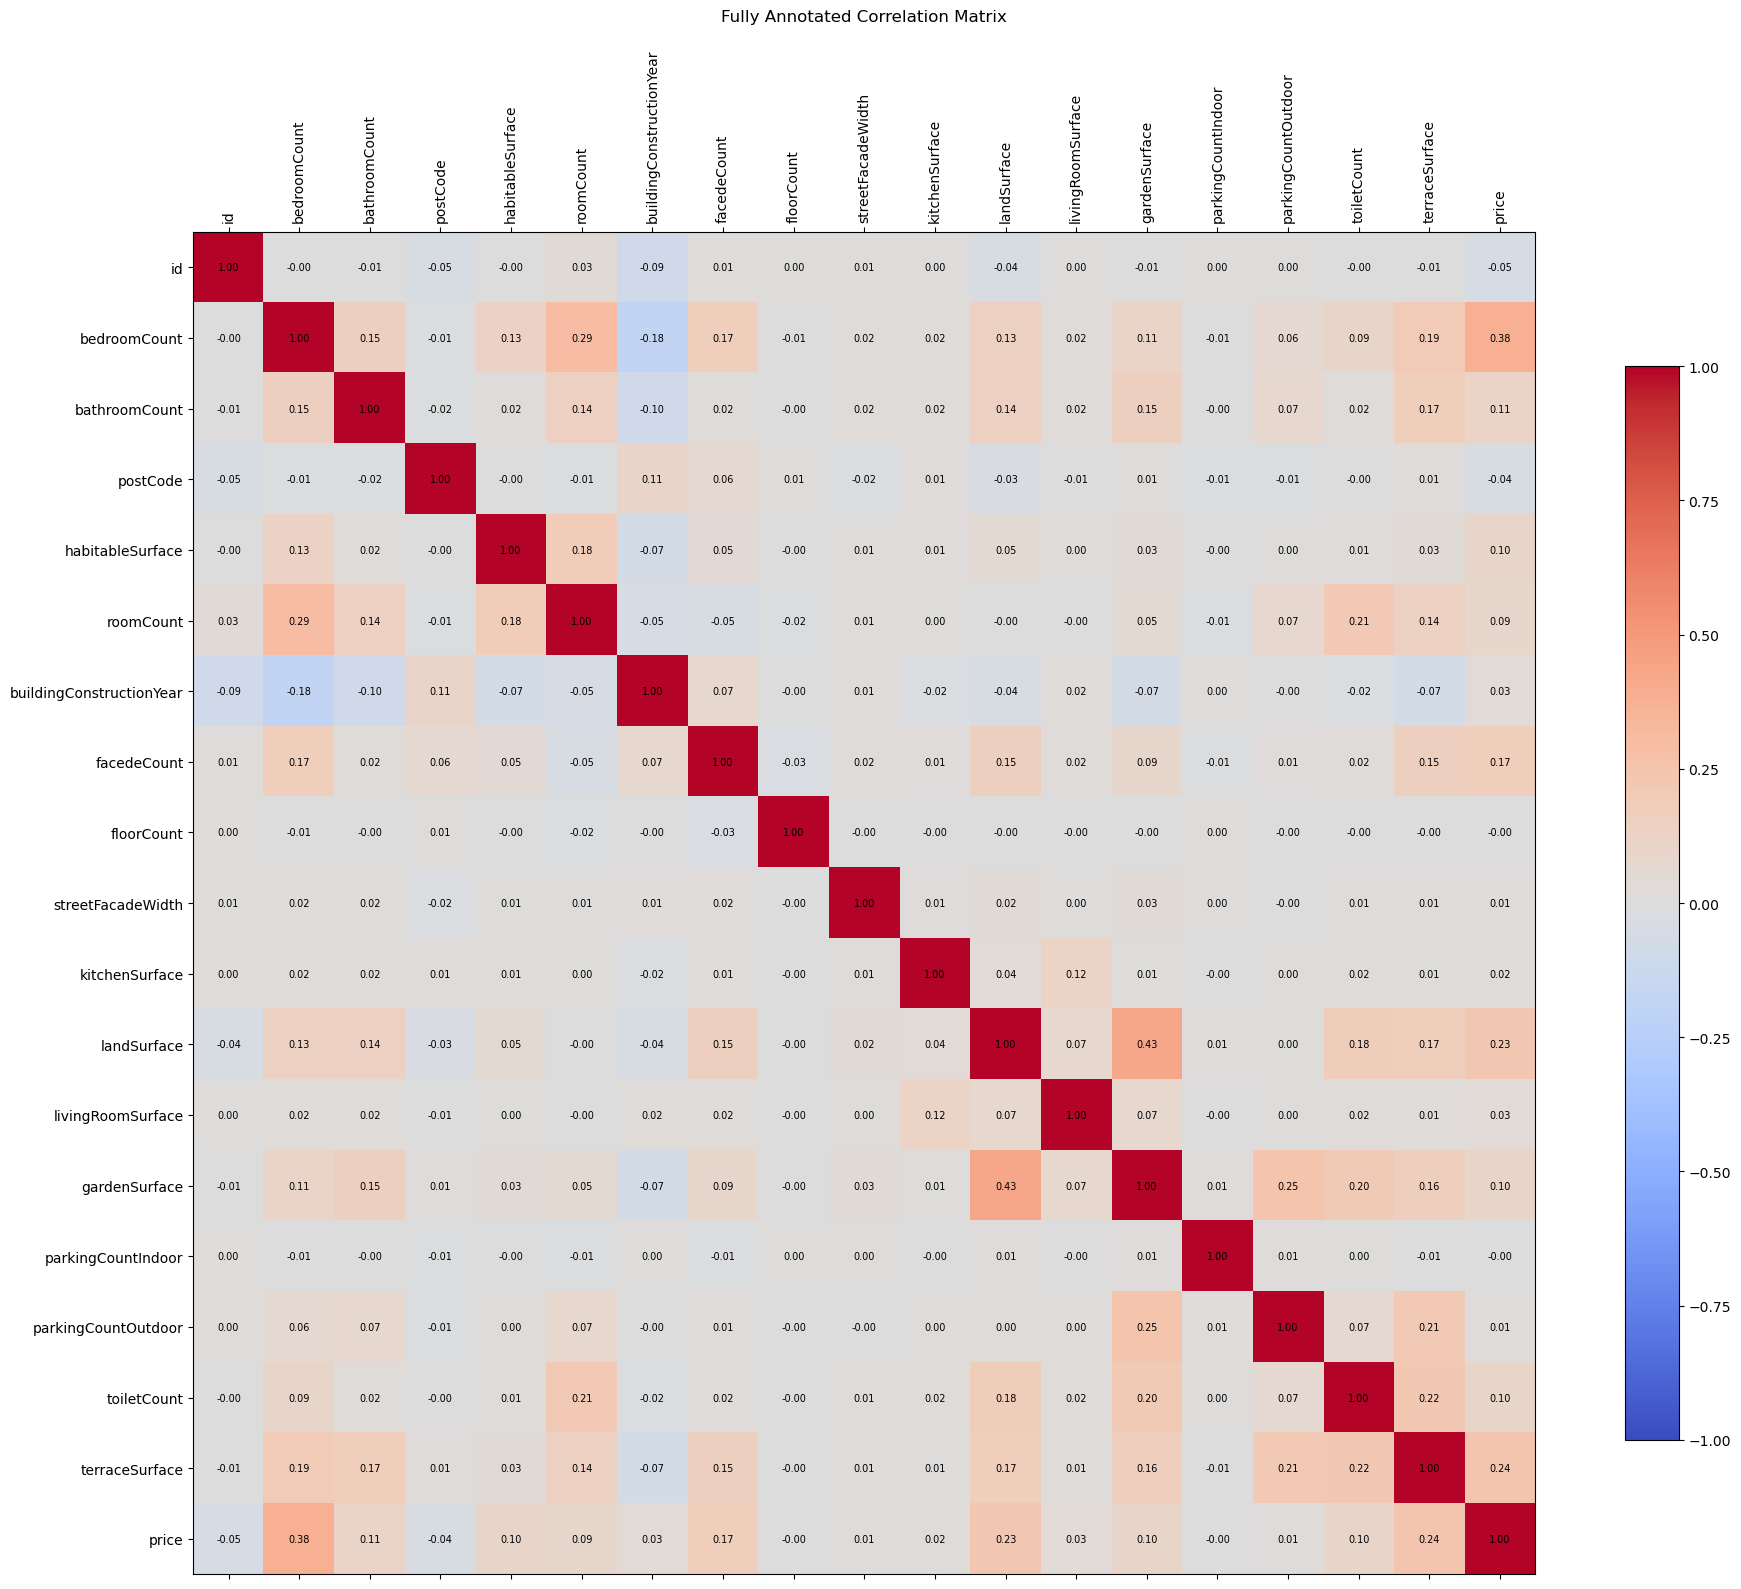

In [42]:
fig, ax = plt.subplots(figsize=(20,16))
cax = ax.matshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, shrink=0.8)

# tick labels
ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# manual annotation loop
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=7)

plt.title("Fully Annotated Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

In [43]:
most_influential = corr_with_price.abs().sort_values(ascending=False).index[1:6]
least_influential = corr_with_price.abs().sort_values(ascending=True).index[:5]

print("Top 5 most influential:", most_influential.tolist())
print("Top 5 least influential:", least_influential.tolist())

Top 5 most influential: ['bedroomCount', 'terraceSurface', 'landSurface', 'facedeCount', 'bathroomCount']
Top 5 least influential: ['floorCount', 'parkingCountIndoor', 'parkingCountOutdoor', 'streetFacadeWidth', 'kitchenSurface']
